In [1]:
from statistics import mean
import numpy as np
from matplotlib import pyplot as plt

In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\hanna\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
COLORS = ['#46535E', '#FDB515', '#00B0DA', '#EE1F60','#3B7EA1', '#D9661F', '#C4820E', '#859438', '#CFDD45']

In [3]:
class Data:
    #
    # each Data object is initialized with a filepath; fields include:
    #
    # 'name' (string):         ID of sample.
    # 'x' (1D numpy array):    x coordinates.
    # 'y' (1D numpy array):    y coordinates.
    #
    def __init__(self, fn):
        self.x = []
        self.y = []
        f = open(fn, "r")
        file = enumerate(f)
        for i, line in file:
            words = line.split()
            if i == 1:
                self.addName(words[2])
            if i >= 12 and len(words) > 0: # lines 13+ but no empty lines.
                self.x.append(float(words[0]))
                self.y.append(float(words[1]))
        f.close()
        self.x = np.array(self.x)
        self.y = np.array(self.y)
 
    def addName(self, nm):
        self.name = nm
        
    def getNumPoints(self):
        return len(self.x)
    
    def scale(self, axis, factor):
        # multiplies every element of x or y axis by factor.
        if axis == 'x':
            self.x *= factor
        elif axis == 'y':
            self.y *= factor
            
    def center(self):
        # fixes offset due to dc voltage or other sources.
        # subtracts the mean y value from every y value.
        self.y -= mean(self.y)
    
    def bestFitSlope(self, start, end):
        # finds the slope of best fit line within start:end.
        x = self.x[start:end]
        y = self.y[start:end]
        m = (((mean(x)*mean(y)) - mean(x*y)) / ((mean(x)*mean(x)) - mean(x*x)))
        return m
    
    def addLine(self, m, positive=True):
        # adds (or subtracts) the line y=slope*x (through B=0 origin).

        for i in range(len(self.x)):
            if not positive:
                self.y[i] -= m*self.x[i]
            else:
                self.y[i] += m*self.x[i]
                
                
                
class Graph:
    def __init__(self, datas, title, xax, yax, fs=14, leg=None, xlim=None, save_name=None):
        self.datas = datas
        self.title = title
        self.xaxis = xax
        self.yaxis = yax
        self.fontsize = fs
        self.legPos = leg
        self.numPoints = 0
        self.xlimit = xlim
        self.save = save_name
        if self.hasData():
            self.numPoints = self.datas[0].getNumPoints()
            
    def hasData(self):
        return len(self.datas) > 0
    
    def addData(self, data):
        if self.hasData():
            self.numPoints = data.getNumPoints()
        self.datas.append(data)
    
    def graphEach(self):
        i = 0
        for data in self.datas:
            plt.plot(data.x, data.y, 'o-', label=data.name, c=COLORS[i])
            i += 1
        self.graph()
    
    def graphAverage(self):
        avgs = []
        for i in range(self.numPoints):
            avgs.append(0)
        if self.hasData():
            for i in range(self.numPoints):
                for data in self.datas:
                    avgs[i] += data.y[i]
                avgs[i] /= len(self.datas)
        plt.plot(data.x, avgs, 'o-')
        self.graph()
    
    def graph(self):
        plt.title(self.title, fontsize=self.fontsize)
        plt.xlabel(self.xaxis, fontsize=self.fontsize)
        plt.ylabel(self.yaxis, fontsize=self.fontsize)
        if self.legPos is not None:
            plt.legend(loc=self.legPos)
        if self.xlimit is not None:
            plt.xlim(self.xlimit)
        if self.save is not None:
            plt.savefig(self.save, dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
        plt.show()

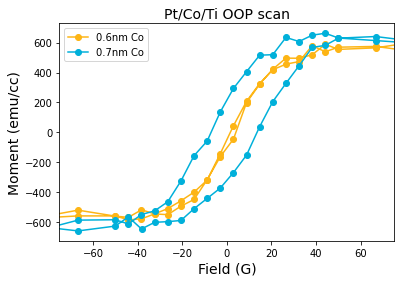

In [4]:
Pt_Co_Ti_OOP = ["20210812/20210812_JH315_HK003_OOP_500G_7p5mm#3.txt",
        "20210812/20210812_JH316_HK004_OOP_500G_7p5mm#1.txt"]
        #"20210811/20210811_JH314_HK002_IP_500G_7p5mm#3.txt"]

volume1 = 0.75*0.75*0.6e-7 # cm^3
volume2 = 0.75*0.75*0.7e-7 # cm^3
volume3 = 0.75*0.75*0.9e-7 # cm^3
field_limit = [-75, 75]
graph = Graph([], title="Pt/Co/Ti OOP scan", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/PtCoTi_OOP")
v = 1
for file in Pt_Co_Ti_OOP:
    # graph
    data = Data(file)
    volume = volume1
    data.addName("0.6nm Co")
    if v == 2:
        volume = volume2
        data.addName("0.7nm Co")
    elif v == 3:
        volume = volume3
        data.addName("0.9nm Co IP")
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    v += 1
    m = data.bestFitSlope(0, 10)
   # data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    
    """# exchange bias
    slope_left, y_int_left = np.polyfit([data.x[37], data.x[38]], [data.y[37], data.y[38]], 1)
    slope_right, y_int_right = np.polyfit([data.x[97], data.x[98]], [data.y[97], data.y[98]], 1)
    # x intercept is coercive field
    x_int_left = -y_int_left / slope_left
    x_int_right = -y_int_right / slope_right
    bias = (x_int_left + x_int_right) / 2
    print(data.name + " bias: " + str(bias))"""
graph.graphEach()

In [1]:
TaPtCoTaOOP = ["20211011/20211011_Co12_OOP_1p5T_7p5mm#3.txt",
              "20211013/20211013_Co12_OOP_1p5T_7p5mm#3.txt",
              "20211013/20211013_Co12_OOP_1p5T_7p5mm#5.txt"]

volume12 = 0.75*0.75*12e-7 # cm^3
field_limit = [-15100, 15100]
graph = Graph([], title="[Ta/Pt/Co/Ta] 12nm-Co OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211004_good_emu")

i = 1
for file in TaPtCoTaOOP:
    # graph
    data = Data(file)
    data.addName(i)
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 10)
    #data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    i += 1
    
graph.graphEach()


graph = Graph([], title="[Ta/Pt/Co/Ta] 12nm-Co OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211004_good_emu")

i = 1
for file in TaPtCoTaOOP:
    # graph
    data = Data(file)
    data.addName(i)
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(4, 10)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    i += 1
    
graph.graphEach()

graph = Graph([], title="[Ta/Pt/Co/Ta] 12nm-Co OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211004_good_emu")

i = 1
for file in TaPtCoTaOOP:
    # graph
    data = Data(file)
    data.addName(i)
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 2)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    i += 1
    
graph.graphEach()

NameError: name 'Graph' is not defined

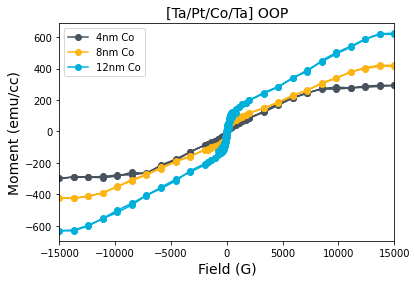

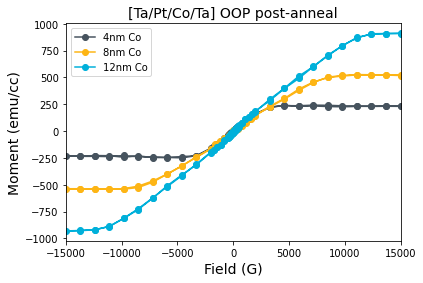

In [54]:
TaPtCoTaOOP = ["20211013/20211013_Co4_OOP_1p5T_7p5mm#2.txt",
              "20211013/20211013_Co8_OOP_1p5T_7p5mm#2.txt",
              "20211013/20211013_Co12_OOP_1p5T_7p5mm#5.txt"]

graph = Graph([], title="[Ta/Pt/Co/Ta] OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211004_good_emu")
volume4 = 0.75*0.75*4e-7 # cm^3
volume8 = 0.75*0.75*8e-7 # cm^3
volume12 = 0.75*0.75*12e-7 # cm^3

v = 1
for file in TaPtCoTaOOP:
    # graph
    data = Data(file)
    volume = volume4
    data.addName("4nm Co")
    if v == 2:
        volume = volume8
        data.addName("8nm Co")
    elif v == 3:
        volume = volume12
        data.addName("12nm Co")
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 2)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    v += 1
    
graph.graphEach()


TaPtCoTaOOP_Anneal00 = ["20211022/20211022_Co4-Anneal00_OOP_1p5T_7p5mm#1.txt",
                  "20211022/20211022_Co8-Anneal00_OOP_1p5T_7p5mm#1.txt",
                  "20211022/20211022_Co12-Anneal00_OOP_1p5T_7p5mm#2.txt"]

graph = Graph([], title="[Ta/Pt/Co/Ta] OOP post-anneal", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211004_good_emu")
volume4 = 0.75*0.75*4e-7 # cm^3
volume8 = 0.75*0.75*8e-7 # cm^3
volume12 = 0.75*0.75*12e-7 # cm^3

v = 1
for file in TaPtCoTaOOP_Anneal00:
    # graph
    data = Data(file)
    volume = volume4
    data.addName("4nm Co")
    if v == 2:
        volume = volume8
        data.addName("8nm Co")
    elif v == 3:
        volume = volume12
        data.addName("12nm Co")
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 2)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    v += 1
    
graph.graphEach()

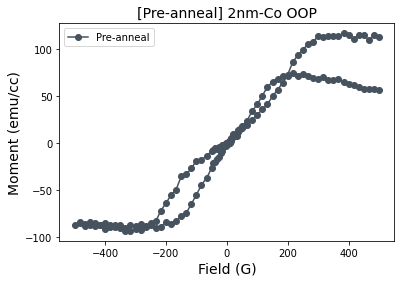

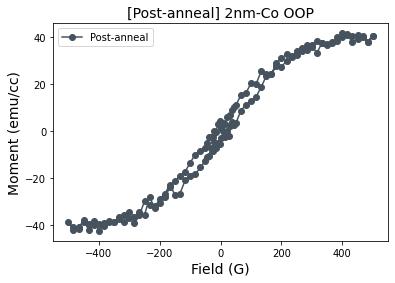

In [5]:
_2nm_OOP = ["20211014/20211014_Co2_OOP_500G_7p5mm#3.txt"]#, "20211021/20211021_Co2-Anneal00_OOP_500G_7p5mm#1.txt"]
_2nm_OOP_Anneal = ["20211021/20211021_Co2-Anneal00_OOP_500G_7p5mm#1.txt"]

graph = Graph([], title="[Pre-anneal] 2nm-Co OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left")#, save_name="Plots/20211102_2nm_OOP_preanneal")#, xlim=field_limit)

i = 1
for file in _2nm_OOP:
    # graph
    data = Data(file)
    data.addName("Pre-anneal")
    if i == 2:
        data.addName("Post-anneal")
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(4, 10)
    #data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    i += 1
    
graph.graphEach()

graph = Graph([], title="[Post-anneal] 2nm-Co OOP", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left")#, save_name="Plots/20211102_2nm_OOP_postanneal")#, xlim=field_limit)
i = 1
for file in _2nm_OOP_Anneal:
    # graph
    data = Data(file)
    data.addName("Post-anneal")
    data.scale('y', 1/volume12)                           # convert emu to emu/cc        
    m = data.bestFitSlope(4, 10)
    #data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    i += 1
    
graph.graphEach()

[746.5166221888849, 957.785962938047, 991.1596475959939, 1059.3965734788242, 1163.630076762475]


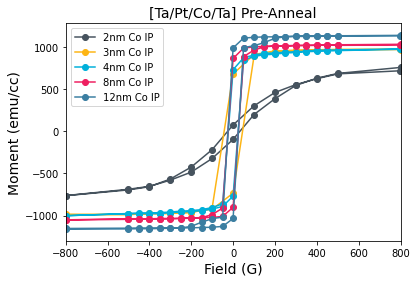

[665.7771491031151, 852.9551764976266, 860.300485373146, 910.202687867764, 1073.045276291719]


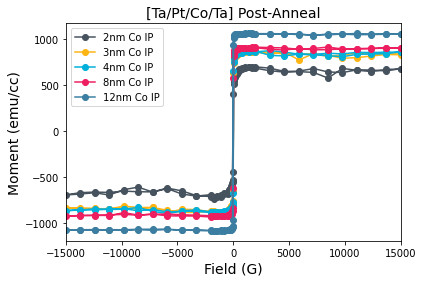

-24.37951871302968
-21.626726157767763


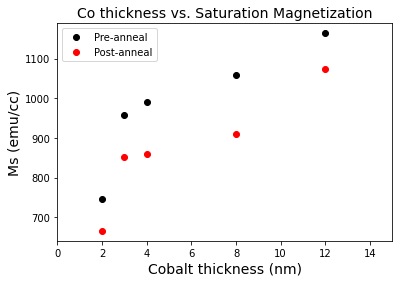

In [5]:
TaPtCoTa = [#"20210913/20210913_Co1_OOP_500G_1p5mm#3.txt",
        "20210913/20210913_Co2_IP_1p5T_1p5mm#1.txt",
        "20210913/20210913_Co3_IP_1p5T_1p5mm#1.txt",
        "20211004/20211004_Co4_IP_1p5T_7p5mm#1.txt",
        "20211004/20211004_Co8_IP_1p5T_7p5mm#2.txt",
        "20211004/20211004_Co12_IP_1p5T_7p5mm#2.txt"]

volume1 = 0.75*0.75*1e-7 # cm^3
volume2 = 0.75*0.75*2e-7 # cm^3
volume3 = 0.75*0.75*3e-7 # cm^3
volume4 = 0.75*0.75*4e-7 # cm^3
volume8 = 0.75*0.75*8e-7 # cm^3
volume12 = 0.75*0.75*12e-7 # cm^3
field_limit = [-800, 800]
graph = Graph([], title="[Ta/Pt/Co/Ta] Pre-Anneal", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211031_preanneal_emucc")

sat_mags_x = [2, 3, 4, 8, 12]#[1, 2, 3, 4, 8, 12]
sat_mags_y = []

v = 2
for file in TaPtCoTa:
    # graph
    data = Data(file)
    volume = volume2
    data.addName("2nm Co IP")
    if v == 3:
        volume = volume3
        data.addName("3nm Co IP")
    elif v == 4:
        volume = volume4
        data.addName("4nm Co IP")
    elif v == 5:
        volume = volume8
        data.addName("8nm Co IP")
    elif v == 6:
        volume = volume12
        data.addName("12nm Co IP")
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 10)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    
    
    # Find saturation magnetization
    saturated = range(0,0)
    #saturated = range(30, 49+1)
    if v > 1:
        saturated = range(30, 49+1)
    elif v == 1:
        saturated = range(58, 89+1)
    average = 0
    for i in saturated:
        average += data.y[i]
    average /= len(saturated)
    average = abs(average)
    sat_mags_y.append(average)
    
    v += 1

print(sat_mags_y)

graph.graphEach()


TaPtCoTa_Anneal = ["20211027/20211027_Co2-Anneal00_IP_1p5T_7p5mm#1.txt",
            "20211027/20211027_Co3-Anneal00_IP_1p5T_7p5mm#1.txt",
            "20211027/20211027_Co4-Anneal00_IP_1p5T_7p5mm#1.txt",
            "20211027/20211027_Co8-Anneal00_IP_1p5T_7p5mm#1.txt",
            "20211027/20211027_Co12-Anneal00_IP_1p5T_7p5mm#1.txt",]

field_limit = [-15000, 15000]
graph = Graph([], title="[Ta/Pt/Co/Ta] Post-Anneal", xax="Field (G)", yax="Moment (emu/cc)", 
              leg="upper left", xlim=field_limit)#, save_name="Plots/20211031_postanneal_emucc")

sat_mags_x_Anneal = [2, 3, 4, 8, 12]
sat_mags_y_Anneal = []

v = 2
for file in TaPtCoTa_Anneal:
    # graph
    data = Data(file)
    volume = volume2
    data.addName("2nm Co IP")
    if v == 3:
        volume = volume3
        data.addName("3nm Co IP")
    elif v == 4:
        volume = volume4
        data.addName("4nm Co IP")
    elif v == 5:
        volume = volume8
        data.addName("8nm Co IP")
    elif v == 6:
        volume = volume12
        data.addName("12nm Co IP")
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    m = data.bestFitSlope(0, 10)
    data.addLine(m, False)                              # subtract out diamagentic effects from Si.
    data.center()
    graph.addData(data)
    
    
    # Find saturation magnetization
    saturated = range(0,0)
    #saturated = range(30, 49+1)
    if v > 1:
        saturated = range(30, 49+1)
    elif v == 1:
        saturated = range(58, 89+1)
    average = 0
    for i in saturated:
        average += data.y[i]
    average /= len(saturated)
    average = abs(average)
    sat_mags_y_Anneal.append(average)
    
    v += 1

print(sat_mags_y_Anneal)

graph.graphEach()

# Plot saturation magnetization
plt.title("Co thickness vs. Saturation Magnetization", fontsize=14)
plt.xlabel("Cobalt thickness (nm)", fontsize=14)
plt.ylabel("Ms (emu/cc)", fontsize=14)
plt.xlim((-5, 15))
#plt.ylim((250, 1200))
plt.plot(sat_mags_x, sat_mags_y, 'o', c='black', label="Pre-anneal")
m, b = np.polyfit(sat_mags_x, sat_mags_y, 1)
#plt.plot([-b/m] + sat_mags_x + [3.5], m*np.array([-b/m] + sat_mags_x + [3.5]) + b, c="black")
#plt.savefig("Plots/20211004_Thickness_vs_Ms(emu)", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
print(-b/m)

#plt.title("Co thickness vs. Saturation Magnetization", fontsize=14)
#plt.xlabel("Cobalt thickness (nm)", fontsize=14)
#plt.ylabel("Ms (emu)", fontsize=14)
plt.xlim((0, 15))
#plt.ylim((0, 0.0009))
plt.plot(sat_mags_x_Anneal, sat_mags_y_Anneal, 'o', c='red', label="Post-anneal")
m, b = np.polyfit(sat_mags_x_Anneal, sat_mags_y_Anneal, 1)
print(-b/m)
plt.legend(loc="upper left")
#plt.plot([-b/m] + sat_mags_x_Anneal + [3.5], m*np.array([-b/m] + sat_mags_x_Anneal + [3.5]) + b, c="red")
#plt.savefig("Plots/20211031_Thickness_vs_Ms(emucc)", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

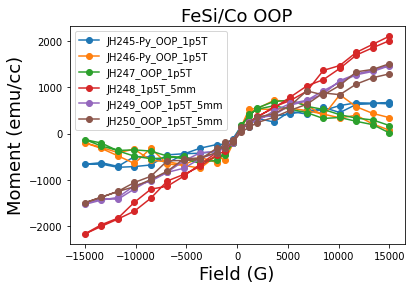

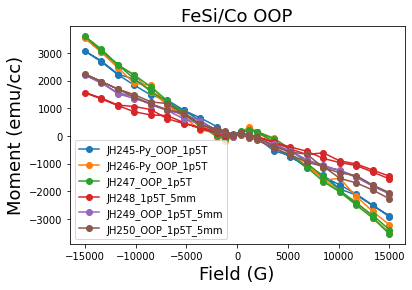

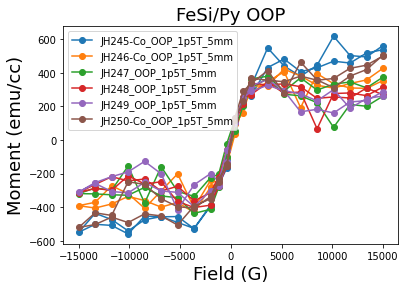

In [4]:
Py_OOP = ["20201113/20201113_JH245-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH246-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH247-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH248-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH249-Co_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH250-Co_OOP_1p5T_5mm#1.txt",]
Co_OOP = ["20201106/20201106_JH245-Py_OOP_1p5T_5mm#2.txt",
        "20201106/20201106_JH246-Py_OOP_1p5T_5mm#4.txt",
        "20201106/20201106_JH247-Py_OOP_1p5T_5mm#1.txt",
        "20201113/20201113_JH248-Py_OOP_1p5T_5mm#3.txt",
        "20201113/20201113_JH249-Py_OOP_1p5T_5mm#2.txt",
        "20201113/20201113_JH250-Py_OOP_1p5T_5mm#1.txt",]

Si = Data("20201113/20201113_Si_OOP_1p5T_5mm#1.txt")

volume = 0.5*0.5*4e-7                                   # volume of samples, in cm^3.

Si.scale('y', 1/volume)
Si.center()
m = Si.bestFitSlope(0, 4)
for file in Co_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.addLine(m, False)                                        # subtract out diamagentic effects from Si.
    data.center()
    plt.plot(data.x, data.y, 'o-', label=data.name)
    
plt.title('FeSi/Co OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="upper left")
plt.show()

for file in Co_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.center()
    plt.plot(data.x, data.y, 'o-', label=data.name)
    
plt.title('FeSi/Co OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="lower left")
plt.show()

for file in Py_OOP:
    data = Data(file)
    data.scale('y', 1/volume)                           # convert emu to emu/cc        
    data.addLine(m, False)                                        # subtract out diamagentic effects from Si.
    data.center()
    plt.plot(data.x, data.y, 'o-', label=data.name)

plt.title('FeSi/Py OOP', fontsize=18)
plt.xlabel('Field (G)', fontsize=18)
plt.ylabel('Moment (emu/cc)', fontsize=18)
plt.legend(loc="upper left")
plt.show()